In [43]:
#importation des packages pour le preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split




In [45]:
pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB 131.3 kB/s eta 0:07:13
   ---------------------------------------- 0.0/56.8 MB 163.8 kB/s eta 0:05:47
   ---------------------------------------- 0.0/56.8 MB 196.9 kB/s eta 0:04:49
   ---------------------------------------- 0.1/56.8 MB 262.6 kB/s eta 0:03:37
   ---------------------------------------- 0.1/56.8 MB 473.7 kB/s eta 0:02:00
   ---------------------------------------- 0.2/56.8 MB 655.6 kB/s eta 0:01:27
   ---------------------------------------- 0.3/56.8 MB 791.9 kB/s eta 0:01:12
   ---------------------------------------- 0.4/56.8 MB 897.8 kB/s eta 0:01:03
   ---------------------------------------- 0.6/56.8 MB 1.2 MB/s eta 0:00:48
    --------------------------------------- 0.8/56.8 MB 1.5 MB/s eta 0:00:39
   

In [46]:
#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import RandomOverSampler


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#Model Performance Evaluators
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [79]:
#chargement de la bd
data = pd.read_csv('creditcarddata.csv')
data

,Gender,Age,HouseTypeID,ContactAvaliabilityID,HomeCountry,AccountNo,CardExpiryDate,TransactionAmount,TransactionCountry,LargePurchase,ProductID,CIF,TransactionCurrencyCode,PotentialFraud
0,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
1,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
2,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
3,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
4,0,56,1,0,1,1109976,1811,1.0354,1,0,3,11020290,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,0,44,1,2,1,7995391,2109,0.0000,1,0,3,11329257,1,0
2262,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0
2263,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0
2264,0,4,0,0,1,7995399,2109,12.4000,1,0,2,11324926,1,0


In [6]:
#infos sur le dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   2266 non-null   int64  
 1   Age                      2266 non-null   int64  
 2   HouseTypeID              2266 non-null   int64  
 3   ContactAvaliabilityID    2266 non-null   int64  
 4   HomeCountry              2266 non-null   int64  
 5   AccountNo                2266 non-null   int64  
 6   CardExpiryDate           2266 non-null   int64  
 7   TransactionAmount        2266 non-null   float64
 8   TransactionCountry       2266 non-null   int64  
 9   LargePurchase            2266 non-null   int64  
 10  ProductID                2266 non-null   int64  
 11  CIF                      2266 non-null   int64  
 12  TransactionCurrencyCode  2266 non-null   int64  
 13  PotentialFraud           2266 non-null   int64  
dtypes: float64(1), int64(13)

In [7]:
#stats sur le df
data.describe()

,Gender,Age,HouseTypeID,ContactAvaliabilityID,HomeCountry,AccountNo,CardExpiryDate,TransactionAmount,TransactionCountry,LargePurchase,ProductID,CIF,TransactionCurrencyCode,PotentialFraud
count,2266.00000,2266.000000,2266.000000,2266.000000,2266.0,2.266000e+03,2266.000000,2266.000000,2266.0,2266.000000,2266.000000,2.266000e+03,2266.0,2266.000000
mean,0.30053,32.703883,0.471756,1.049426,1.0,7.430469e+06,2073.290380,45.039090,1.0,0.003089,2.711827,1.113007e+07,1.0,0.111650
std,0.45859,18.020767,0.499312,0.856211,0.0,1.308356e+06,63.267542,90.811319,0.0,0.055506,0.486835,2.567096e+05,0.0,0.315005
min,0.00000,2.000000,0.000000,0.000000,1.0,1.109976e+06,1706.000000,0.000000,1.0,0.000000,1.000000,1.023500e+07,1.0,0.000000
25%,0.00000,17.000000,0.000000,0.000000,1.0,7.627307e+06,2101.000000,1.526750,1.0,0.000000,2.000000,1.113235e+07,1.0,0.000000
50%,0.00000,33.000000,0.000000,1.000000,1.0,7.698046e+06,2102.000000,10.772500,1.0,0.000000,3.000000,1.124670e+07,1.0,0.000000
75%,1.00000,50.000000,1.000000,2.000000,1.0,7.805829e+06,2105.000000,37.200000,1.0,0.000000,3.000000,1.126767e+07,1.0,0.000000
max,1.00000,63.000000,1.000000,2.000000,1.0,7.995399e+06,2109.000000,976.500000,1.0,1.000000,3.000000,1.132926e+07,1.0,1.000000


In [8]:
#verification de l'existance des valeurs nulles
data.isnull().sum()

Gender                     0
Age                        0
HouseTypeID                0
ContactAvaliabilityID      0
HomeCountry                0
AccountNo                  0
CardExpiryDate             0
TransactionAmount          0
TransactionCountry         0
LargePurchase              0
ProductID                  0
CIF                        0
TransactionCurrencyCode    0
PotentialFraud             0
dtype: int64

In [9]:
#verification des doublons
data.duplicated().sum()

933

on note la presence de valeurs dupliquées important à supprimer pour une bonne analyse des données

In [20]:
#suppression des doublons
data.drop_duplicates(inplace = True)


In [21]:
#verification aprés suppression
data.duplicated().sum()

0

In [22]:
#verification aprés suppression
data.isnull().sum()

Gender                     0
Age                        0
HouseTypeID                0
ContactAvaliabilityID      0
HomeCountry                0
AccountNo                  0
CardExpiryDate             0
TransactionAmount          0
TransactionCountry         0
LargePurchase              0
ProductID                  0
CIF                        0
TransactionCurrencyCode    0
PotentialFraud             0
dtype: int64

On a notre dataframe sans des valeurs dupliquées et des valeurs nulles

In [24]:
#revoir les infos sur le df
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333 entries, 0 to 2262
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   1333 non-null   int64  
 1   Age                      1333 non-null   int64  
 2   HouseTypeID              1333 non-null   int64  
 3   ContactAvaliabilityID    1333 non-null   int64  
 4   HomeCountry              1333 non-null   int64  
 5   AccountNo                1333 non-null   int64  
 6   CardExpiryDate           1333 non-null   int64  
 7   TransactionAmount        1333 non-null   float64
 8   TransactionCountry       1333 non-null   int64  
 9   LargePurchase            1333 non-null   int64  
 10  ProductID                1333 non-null   int64  
 11  CIF                      1333 non-null   int64  
 12  TransactionCurrencyCode  1333 non-null   int64  
 13  PotentialFraud           1333 non-null   int64  
dtypes: float64(1), int64(13)
memo

Pas besoin dencoder les variables car on remarque pas la présence de variable categorielle

In [31]:
#meilleure vue sur les infos sur les types du df
data.dtypes.value_counts()


int64      13
float64     1
Name: count, dtype: int64

Résumé des statistiques
Les statistiques récapitulatives sont là pour nous donner une vue d'ensemble des métriques de notre ensemble de données en un coup d'œil.

Elles comprennent le nombre d'observations, la moyenne des observations, l'écart type, la valeur minimale, le quartile de 25 %, le quartile de 50 %, le quartile de 75 % et la valeur maximale de chaque série.

Les variables catégorielles ou les chaînes de caractères ne sont généralement pas incluses dans les résultats des statistiques récapitulatives.

In [25]:
#revoir les stats apres nettoyage
data.describe()

,Gender,Age,HouseTypeID,ContactAvaliabilityID,HomeCountry,AccountNo,CardExpiryDate,TransactionAmount,TransactionCountry,LargePurchase,ProductID,CIF,TransactionCurrencyCode,PotentialFraud
count,1333.000000,1333.000000,1333.000000,1333.000000,1333.0,1.333000e+03,1333.000000,1333.000000,1333.0,1333.000000,1333.000000,1.333000e+03,1333.0,1333.000000
mean,0.308327,32.794449,0.451613,1.078020,1.0,7.432076e+06,2074.357089,44.566642,1.0,0.002251,2.720180,1.112942e+07,1.0,0.111028
std,0.461976,18.060286,0.497840,0.850669,0.0,1.305522e+06,61.978249,85.289470,0.0,0.047404,0.478225,2.558224e+05,0.0,0.314284
min,0.000000,2.000000,0.000000,0.000000,1.0,1.109976e+06,1706.000000,0.000000,1.0,0.000000,1.000000,1.023500e+07,1.0,0.000000
25%,0.000000,17.000000,0.000000,0.000000,1.0,7.627307e+06,2101.000000,1.295800,1.0,0.000000,2.000000,1.112675e+07,1.0,0.000000
50%,0.000000,33.000000,0.000000,1.000000,1.0,7.698046e+06,2103.000000,11.395600,1.0,0.000000,3.000000,1.124655e+07,1.0,0.000000
75%,1.000000,50.000000,1.000000,2.000000,1.0,7.805955e+06,2105.000000,39.835000,1.0,0.000000,3.000000,1.126767e+07,1.0,0.000000
max,1.000000,63.000000,1.000000,2.000000,1.0,7.995399e+06,2109.000000,976.500000,1.0,1.000000,3.000000,1.132926e+07,1.0,1.000000


bien dans un cas supervisé de classification binaire
Le dataset contient plusieurs variables inutiles à retirer avant le modèle :
HomeCountry, TransactionCountry, TransactionCurrencyCode, AccountNo, CIF.
Il y a un déséquilibre de classes à gérer.
Certaines variables doivent être normalisées (TransactionAmount) et d’autres encodées (HouseTypeID, ProductID, etc.).

Aperçu du dataset

On a 1333 lignes (observations) et 14 variables :
Gender, Age, HouseTypeID, ContactAvaliabilityID, HomeCountry, AccountNo, CardExpiryDate, TransactionAmount, TransactionCountry, LargePurchase, ProductID, CIF, TransactionCurrencyCode, PotentialFraud.

1. Gender
Statistique	Valeur
Moyenne	0.308
Min	0
Max	1

C’est une variable binaire (0/1).
Probablement :
0 = Homme
1 = Femme

Interprétation :

En moyenne, 30,8 % des clients sont des femmes.

Donc le dataset contient environ 69 % d’hommes et 31 % de femmes.

2. Age

| Moyenne | 32.79 ans |
| Écart-type | 18.06 |
| Min | 2 ans |
| Max | 63 ans |

Interprétation :

L’âge moyen des clients est environ 33 ans.

La valeur minimale (2 ans) semble aberrante — un enfant de 2 ans n’a pas de carte bancaire , à corriger.

La dispersion (écart-type 18) montre une variété importante d’âges, de jeunes à seniors.

3. HouseTypeID

| Min | 0 |
| Max | 1 |
| Moyenne | 0.45 |

Variable catégorielle codée en numérique (probablement :

0 = Appartement,

1 = Maison).

Interprétation :

45 % vivent en maison, 55 % en appartement.

4. ContactAvaliabilityID

| Min | 0 |
| Max | 2 |
| Moyenne | 1.078 |

Variable catégorielle discrète (peut-être :

0 = Aucun contact,

1 = Téléphone,

2 = Email ou complet).

Moyenne proche de 1 → la plupart ont un niveau de contact basique ou intermédiaire.

5. HomeCountry

| Min | 1 |
| Max | 1 |

 Valeur constante (1 partout) 
Cela signifie que tous les clients viennent du même pays → pas de variabilité, donc variable inutile pour le modèle (à supprimer).

6. AccountNo

| Moyenne | 7 432 076 |
| Min | 1 109 976 |
| Max | 7 995 399 |

Ce champ correspond sûrement à un numéro de compte.
Ce n’est pas une variable explicative utile (identifiant unique), donc à supprimer du modèle.

7. CardExpiryDate

| Moyenne | 2074 |
| Min | 1706 |
| Max | 2109 |

Cela semble représenter l’année (et mois) d’expiration de la carte (peut-être 2109 = 2021-09).
À convertir correctement (par ex. en mois restants avant expiration).
Sinon, inutile sous forme brute.

8. TransactionAmount

| Moyenne | 44.57 |
| Écart-type | 85.28 |
| Min | 0 |
| Max | 976.5 |

Montant moyen d’une transaction ≈ 44.5 unités (probablement en monnaie locale).
Mais la grande dispersion (écart-type 85) montre qu’il existe des transactions très variées, allant de 0 à presque 1000.

À normaliser ou standardiser avant d’entraîner le modèle.

9. TransactionCountry

| Min | 1 |
| Max | 1 |

Valeur constante : tous les clients effectuent leurs transactions dans le même pays → variable inutile à supprimer.

10. LargePurchase

| Moyenne | 0.00225 |
| Min | 0 |
| Max | 1 |

Variable binaire, probablement :

1 = Achat important,

0 = Achat normal.

Seulement 0,22 % de transactions concernent un achat important → classe très rare.

11. ProductID

| Min | 1 |
| Max | 3 |
| Moyenne | 2.72 |

3 types de produits bancaires environ (carte standard, premium, etc.).
La moyenne proche de 3 montre que la majorité utilise le produit n°3.

12. CIF

| Moyenne | 1.11e+07 |
| Min | 1.02e+07 |
| Max | 1.13e+07 |

Probablement un identifiant client unique (Customer Information File).
À supprimer : variable non informative.

13. TransactionCurrencyCode

| Min | 1 |
| Max | 1 |

Code devise constant → inutilisable (pas de variance).
À supprimer.

14. PotentialFraud

| Moyenne | 0.111 |
| Écart-type | 0.314 |
| Min | 0 |
| Max | 1 |

C’est la variable cible 

Moyenne 0.111 → environ 11 % des transactions sont frauduleuses.

Donc tu as un déséquilibre de classes (89 % non fraude, 11 % fraude).
Il faudra traiter ce déséquilibre avec SMOTE ou class_weight='balanced'.

In [28]:
#voir les colonnes su df essentiels pour voir ceux importants
data.columns

Index(['Gender', 'Age', 'HouseTypeID', 'ContactAvaliabilityID', 'HomeCountry',
       'AccountNo', 'CardExpiryDate', 'TransactionAmount',
       'TransactionCountry', 'LargePurchase', 'ProductID', 'CIF',
       'TransactionCurrencyCode', 'PotentialFraud'],
      dtype='object')

In [30]:
#verifier le count pour chaque colonne du df
data.count()

Gender                     641
Age                        641
HouseTypeID                641
ContactAvaliabilityID      641
HomeCountry                641
AccountNo                  641
CardExpiryDate             641
TransactionAmount          641
TransactionCountry         641
LargePurchase              641
ProductID                  641
CIF                        641
TransactionCurrencyCode    641
PotentialFraud             641
dtype: int64

depourvu de doublons

In [26]:
#remplacer les NaN par des zeros
data.fillna(0,inplace=True)

In [32]:
#On ne garde que les variables numériques explicatives pertinentes :

num_cols = ['Age', 'CardExpiryDate', 'TransactionAmount']

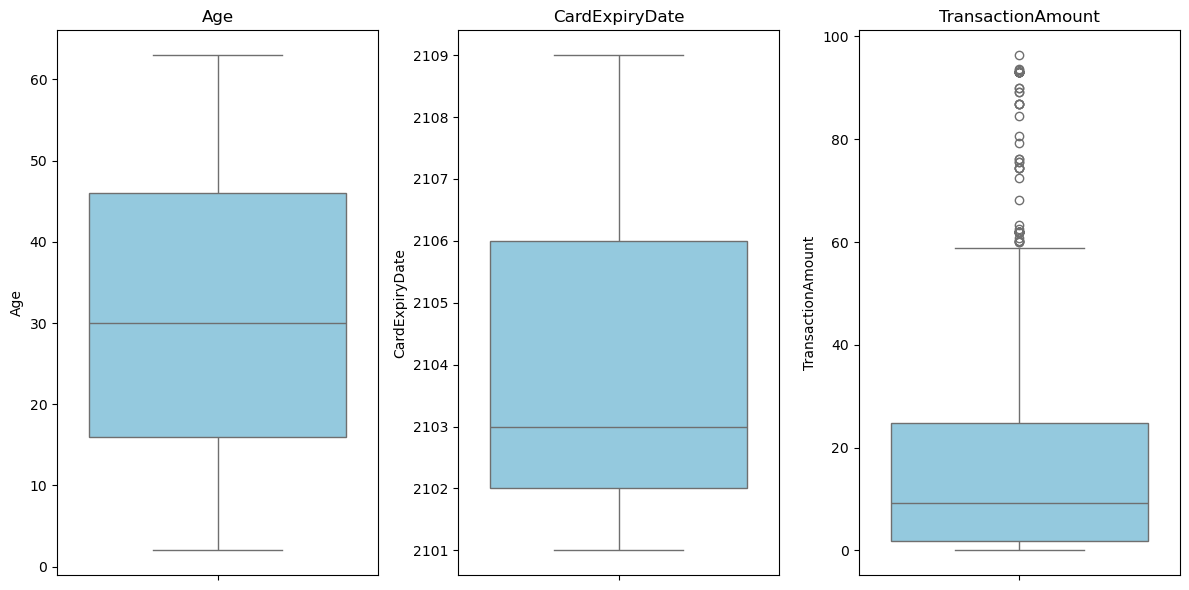

In [33]:

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()



Interprétation :

On voit des points isolés en dehors de la boîte pour la variable TransactionAmount mais normale pour les autres, ce sont des valeurs aberrantes.

Par exemple, si TransactionAmount monte jusqu’à 1000 alors que la majorité des valeurs sont < 100, ce sont des outliers.

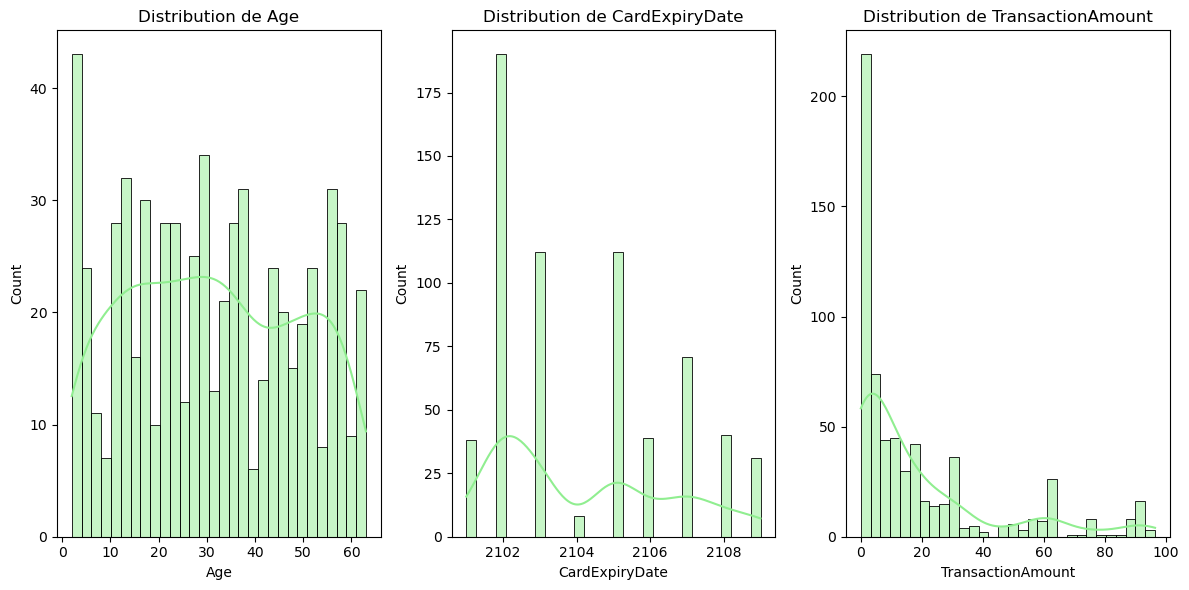

In [34]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(data[col], bins=30, kde=True, color='lightgreen')
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()

Lecture :

On observe une longue traîne ( à droite) pour la variable TransactionAmount, cela peut indiquer des montants exceptionnellement élevés (outliers).

In [35]:

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers, lower, upper



In [36]:
outliers, lower, upper = detect_outliers_iqr(data, 'TransactionAmount')
print(f"Bornes normales : [{lower:.2f}, {upper:.2f}]")
print(f"Nombre d’outliers détectés : {len(outliers)}")

Bornes normales : [-32.88, 59.41]
Nombre d’outliers détectés : 72


In [38]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Appliquer la fonction
for col in num_cols:
    data = remove_outliers_iqr(data, col)

print("Outliers supprimés avec succès.")

Outliers supprimés avec succès.


In [39]:

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower, lower, data[col])
    data[col] = np.where(data[col] > upper, upper, data[col])


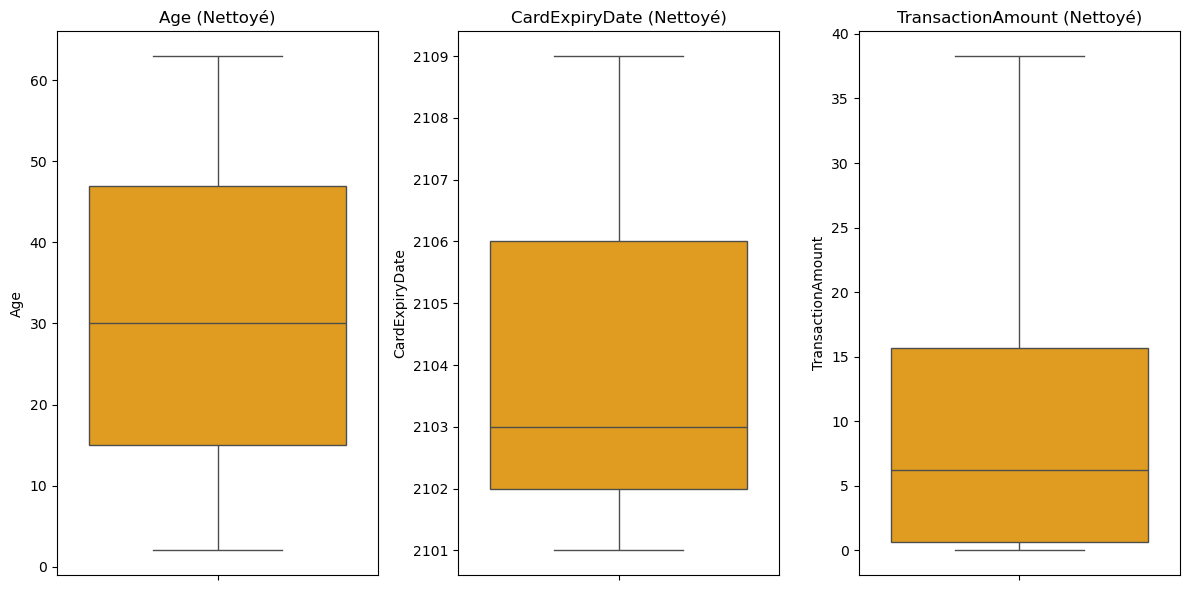

In [40]:
# Refaire les boxplots pour vérifier
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=data[col], color='orange')
    plt.title(f"{col} (Nettoyé)")
plt.tight_layout()
plt.show()

In [41]:
data.to_csv("creditcarddata_propre.csv", index=False)
print("✅ Dataset sauvegardé sous creditcarddata_propre.csv")

✅ Dataset sauvegardé sous creditcarddata_propre.csv


In [48]:
data['PotentialFraud'].value_counts(normalize=True)


PotentialFraud
0    1.0
Name: proportion, dtype: float64

In [88]:
X = data[["Age", "TransactionAmount", "CardExpiryDate"]]  # variables utiles
y = data["PotentialFraud"]

In [89]:
# Séparation du jeu de données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [90]:
print("Taille X_train :", X_train.shape)
print("Taille X_test :", X_test.shape)
print("Distribution y_train :")
print(y_train.value_counts(normalize=True))

Taille X_train : (1586, 3)
Taille X_test : (680, 3)
Distribution y_train :
PotentialFraud
0    0.888398
1    0.111602
Name: proportion, dtype: float64


In [55]:
from sklearn.model_selection import train_test_split

In [85]:
train_data, test_data = train_test_split(data1, test_size=0.3, random_state=42)


In [86]:
# Afficher la taille des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement :", train_data.shape)
print("Taille de l'ensemble de test :", test_data.shape)

Taille de l'ensemble d'entraînement : (1586, 3)
Taille de l'ensemble de test : (680, 3)


In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [92]:
print("Valeurs uniques de y :", y.unique())
print("Répartition des classes :")
print(y.value_counts())


Valeurs uniques de y : [0 1]
Répartition des classes :
PotentialFraud
0    2013
1     253
Name: count, dtype: int64


In [93]:
#definition des modeles
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Régression Logistique": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Forêt Aléatoire": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', gamma='auto', class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}


In [94]:
#entrainement et evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append([name, acc, prec, rec, f1])
    print(f"\n=== {name} ===")
    print("Accuracy :", round(acc, 3))
    print("Precision :", round(prec, 3))
    print("Recall :", round(rec, 3))
    print("F1-score :", round(f1, 3))
    print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
    print("\nRapport de classification :\n", classification_report(y_test, y_pred))



=== Régression Logistique ===
Accuracy : 0.475
Precision : 0.135
Recall : 0.684
F1-score : 0.226
Matrice de confusion :
 [[271 333]
 [ 24  52]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.92      0.45      0.60       604
           1       0.14      0.68      0.23        76

    accuracy                           0.47       680
   macro avg       0.53      0.57      0.41       680
weighted avg       0.83      0.47      0.56       680


=== Forêt Aléatoire ===
Accuracy : 0.901
Precision : 0.554
Recall : 0.605
F1-score : 0.579
Matrice de confusion :
 [[567  37]
 [ 30  46]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       604
           1       0.55      0.61      0.58        76

    accuracy                           0.90       680
   macro avg       0.75      0.77      0.76       680
weighted avg       0.91      0.90      0.90       680


=

In [95]:
#tableau comparatif des performances
results_df = pd.DataFrame(results, columns=["Modèle", "Accuracy", "Precision", "Recall", "F1"])
results_df = results_df.sort_values(by="F1", ascending=False)
print("\nComparaison des modèles :")
print(results_df)



Comparaison des modèles :
                  Modèle  Accuracy  Precision    Recall        F1
1        Forêt Aléatoire  0.901471   0.554217  0.605263  0.578616
5                XGBoost  0.908824   0.625000  0.460526  0.530303
4      Gradient Boosting  0.898529   0.606061  0.263158  0.366972
3                    KNN  0.879412   0.411765  0.184211  0.254545
2              SVM (RBF)  0.561765   0.153125  0.644737  0.247475
0  Régression Logistique  0.475000   0.135065  0.684211  0.225597


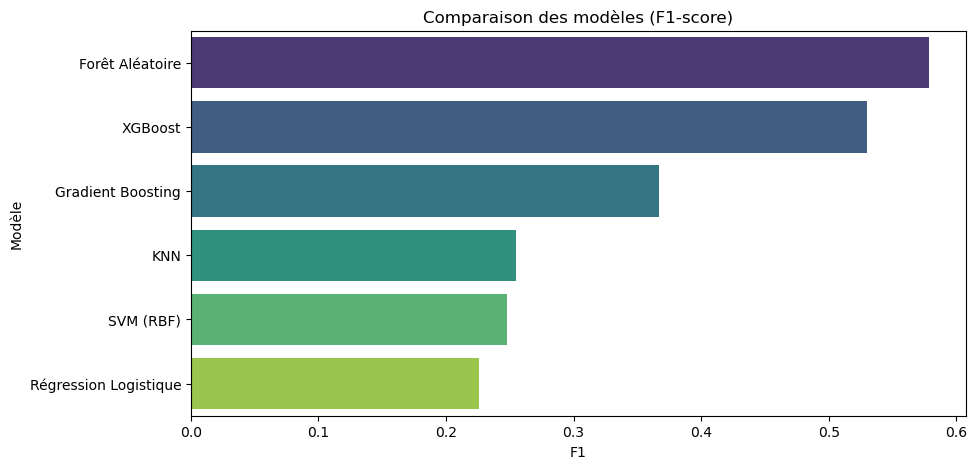

In [96]:
#visualisation des performances
plt.figure(figsize=(10,5))
sns.barplot(x='F1', y='Modèle', data=results_df, palette='viridis')
plt.title("Comparaison des modèles (F1-score)")
plt.show()


In [97]:
#sauvegarde du meilleur modele
import joblib

best_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
best_model.fit(X_train_scaled, y_train)
joblib.dump(best_model, 'modele_fraude.pkl')
print("✅ Modèle sauvegardé sous modele_fraude.pkl")


✅ Modèle sauvegardé sous modele_fraude.pkl


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn import metrics
predictions = model.predict(X_test)
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("R2:", metrics.r2_score(y_test, predictions))
performance = {
    'MAE': mean_absolute_error(y_test, predictions),
    'MSE': mean_squared_error(y_test, predictions),
    'R2': r2_score(y_test, predictions)
    
}
#sauvegarde du modele
import joblib as jb
jb.dump(model, 'linear_regression_model.pkl')
